In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [2]:
train_dir=r"C:\Users\kowsalya saravanan\Downloads\techno intern\CIFAR10\train"
test_dir=r"C:\Users\kowsalya saravanan\Downloads\techno intern\CIFAR10\test"

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2)

test_data=train_datagen.flow_from_directory(train_dir,target_size=(32,32),class_mode='categorical',batch_size=32)
train_data=test_datagen.flow_from_directory(test_dir,target_size=(32,32),class_mode='categorical',batch_size=32)

Found 6420 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [4]:
train_img,train_label=next(train_data)
test_img,test_label=next(test_data)

In [5]:
class_name=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse','ship','truck']

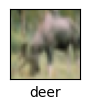

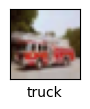

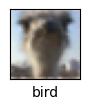

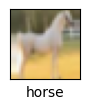

In [28]:
for i in range(4):
  plt.figure(figsize=(2,2))
  plt.subplot(2,2,i+1)
  plt.imshow(train_img[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_name[np.argmax(train_label[i])])

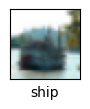

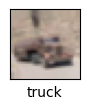

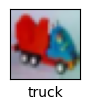

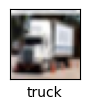

In [31]:
for i in range(4):
  plt.figure(figsize=(2,2))
  plt.subplot(2,2,i+1)
  plt.imshow(test_img[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_name[np.argmax(test_label[i])])

In [8]:
train_img.shape

(32, 32, 32, 3)

In [9]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(68,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(68,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(train_data,batch_size=32,validation_data=test_data,epochs=20)

Epoch 1/20
313/313 [==============================] - 202s 644ms/step - loss: 1.8175 - accuracy: 0.3477 - val_loss: 1.6501 - val_accuracy: 0.3315
Epoch 2/20
313/313 [==============================] - 27s 87ms/step - loss: 1.5128 - accuracy: 0.4565 - val_loss: 1.4488 - val_accuracy: 0.4578
Epoch 3/20
313/313 [==============================] - 28s 90ms/step - loss: 1.3762 - accuracy: 0.5086 - val_loss: 1.1498 - val_accuracy: 0.6184
Epoch 4/20
313/313 [==============================] - 28s 91ms/step - loss: 1.2827 - accuracy: 0.5433 - val_loss: 1.0622 - val_accuracy: 0.6371
Epoch 5/20
313/313 [==============================] - 29s 93ms/step - loss: 1.2074 - accuracy: 0.5798 - val_loss: 1.2958 - val_accuracy: 0.5319
Epoch 6/20
313/313 [==============================] - 29s 92ms/step - loss: 1.1511 - accuracy: 0.5948 - val_loss: 0.8831 - val_accuracy: 0.7048
Epoch 7/20
313/313 [==============================] - 29s 92ms/step - loss: 1.0921 - accuracy: 0.6187 - val_loss: 1.3234 - val_accurac

In [15]:
history=model.fit(train_data,batch_size=32,validation_data=test_data,epochs=50,initial_epoch=10)

Epoch 11/50
313/313 [==============================] - 28s 90ms/step - loss: 0.6476 - accuracy: 0.7664 - val_loss: 1.3802 - val_accuracy: 0.6044
Epoch 12/50
313/313 [==============================] - 27s 87ms/step - loss: 0.6112 - accuracy: 0.7845 - val_loss: 1.2646 - val_accuracy: 0.6520
Epoch 13/50
313/313 [==============================] - 30s 94ms/step - loss: 0.5978 - accuracy: 0.7876 - val_loss: 1.1872 - val_accuracy: 0.6458
Epoch 14/50
313/313 [==============================] - 30s 96ms/step - loss: 0.5730 - accuracy: 0.8005 - val_loss: 1.1003 - val_accuracy: 0.6732
Epoch 15/50
313/313 [==============================] - 31s 99ms/step - loss: 0.5421 - accuracy: 0.8070 - val_loss: 0.8264 - val_accuracy: 0.7597
Epoch 16/50
313/313 [==============================] - 33s 104ms/step - loss: 0.5305 - accuracy: 0.8120 - val_loss: 1.0352 - val_accuracy: 0.6974
Epoch 17/50
313/313 [==============================] - 31s 98ms/step - loss: 0.5082 - accuracy: 0.8189 - val_loss: 1.3074 - val_a

Text(0, 0.5, 'accuracy')

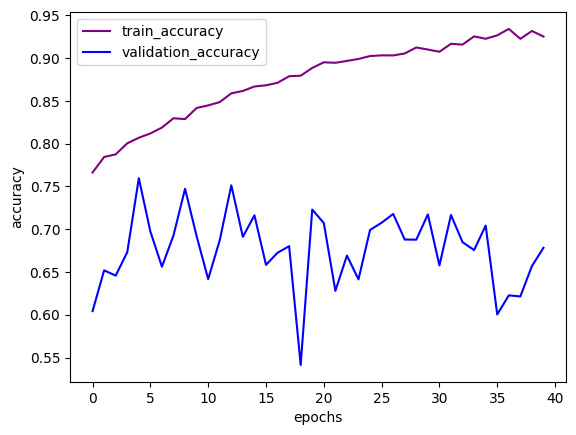

In [34]:
plt.plot(history.history['accuracy'],color='purple')
plt.plot(history.history['val_accuracy'],color='blue')
plt.legend(['train_accuracy','validation_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

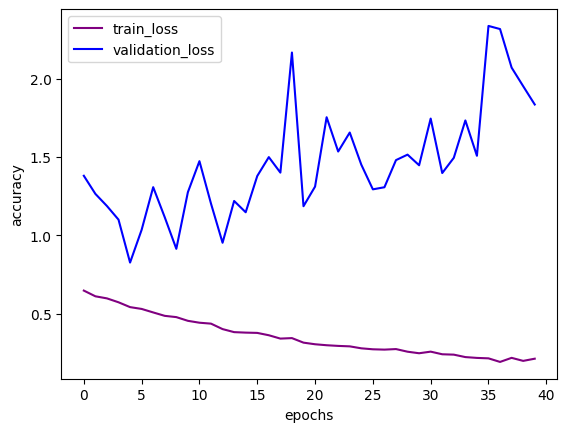

In [33]:
plt.plot(history.history['loss'],color='purple')
plt.plot(history.history['val_loss'],color='blue')
plt.legend(['train_loss','validation_loss'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [17]:
pred_img=load_img(r"C:\Users\kowsalya saravanan\Downloads\techno intern\CIFAR10\test\horse\1040_horse.png",target_size=(32,32))
img_arr=img_to_array(pred_img)
arr=np.expand_dims(img_arr,axis=0)
img=arr/255.0
prediction=model.predict(img)[0]
pred_class=np.argmax(prediction)

1/1 [==============================] - 0s 187ms/step


class_name:horse,confidence:0.9999996423721313


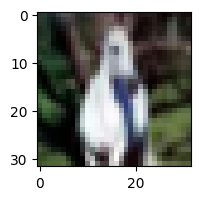

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(pred_img)
print('class_name:{},confidence:{}'.format(class_name[pred_class],prediction[pred_class]))

In [37]:
pred_img=load_img(r"C:\Users\kowsalya saravanan\Downloads\techno intern\CIFAR10\test\bird\564_bird.png",target_size=(32,32))
img_arr=img_to_array(pred_img)
arr=np.expand_dims(img_arr,axis=0)
img=arr/255.0
prediction=model.predict(img)[0]
pred_class=np.argmax(prediction)

1/1 [==============================] - 0s 60ms/step


class_name:bird,confidence:0.9254618883132935


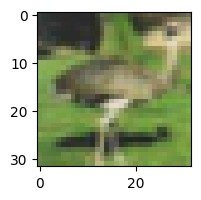

In [38]:
plt.figure(figsize=(2,2))
plt.imshow(pred_img)
print('class_name:{},confidence:{}'.format(class_name[pred_class],prediction[pred_class]))